In [4]:
#debug pandas not importing
import sys
print(sys.executable)
#taking the information from the line above -- directly import pandas module in here -- this is some wizardry
! /Users/Amy/anaconda3/python.exe -m pip install pandas

C:\Users\Amy\anaconda3\python.exe


Step 1 - import data into juypter notebook

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Step 2 - Use matplotlib to make a barplot of the data and check for outliers

In [5]:
#import the data
df = pd.read_csv("DESEQ2NormalizedData.csv", index_col=0)
df.head()

,1,100,1000,10000,100009676,10001,10003,100037417,10004,100049716,...,9987,9988,9989,999,9990,9991,9992,9993,9994,9997
GSM3577568,8.103918,7.937909,10.257489,11.186453,5.995394,7.667819,9.199965,10.280796,6.549983,6.243322,...,11.221806,10.175303,10.056090,5.454826,9.981236,8.396273,5.518956,11.268024,6.487247,9.417459
GSM3577569,7.009610,7.902695,10.120491,10.939458,6.258109,7.682248,7.454174,8.647815,6.885065,6.598184,...,12.246937,11.343959,10.626753,7.470028,10.016374,8.426003,3.276256,11.831612,8.417852,8.438144
GSM3577570,7.046131,7.680613,10.303429,11.387845,6.331885,7.715589,8.728490,8.635666,6.113245,6.541339,...,12.492072,11.431233,10.663922,8.280252,10.833722,8.928075,2.653813,11.588094,9.232752,8.337510
GSM3577571,7.486468,7.611999,10.277881,11.121012,5.280793,7.842296,8.047696,9.168947,6.455880,6.257334,...,11.654149,10.630377,10.269111,5.818450,9.913436,8.332221,4.326597,11.708139,7.896452,9.286598
GSM3577572,7.553102,8.112529,10.274801,11.085076,6.112529,7.578193,7.974453,8.771874,6.264532,7.089446,...,11.903434,10.865720,10.183736,5.993230,10.011766,8.448132,4.383177,11.705105,8.359251,9.140874


In [6]:
#returns the "dimensions" of the data
df.shape

(289, 16232)

In [7]:
#swaps the x and y values
data = df.transpose()
data.shape

(16232, 289)

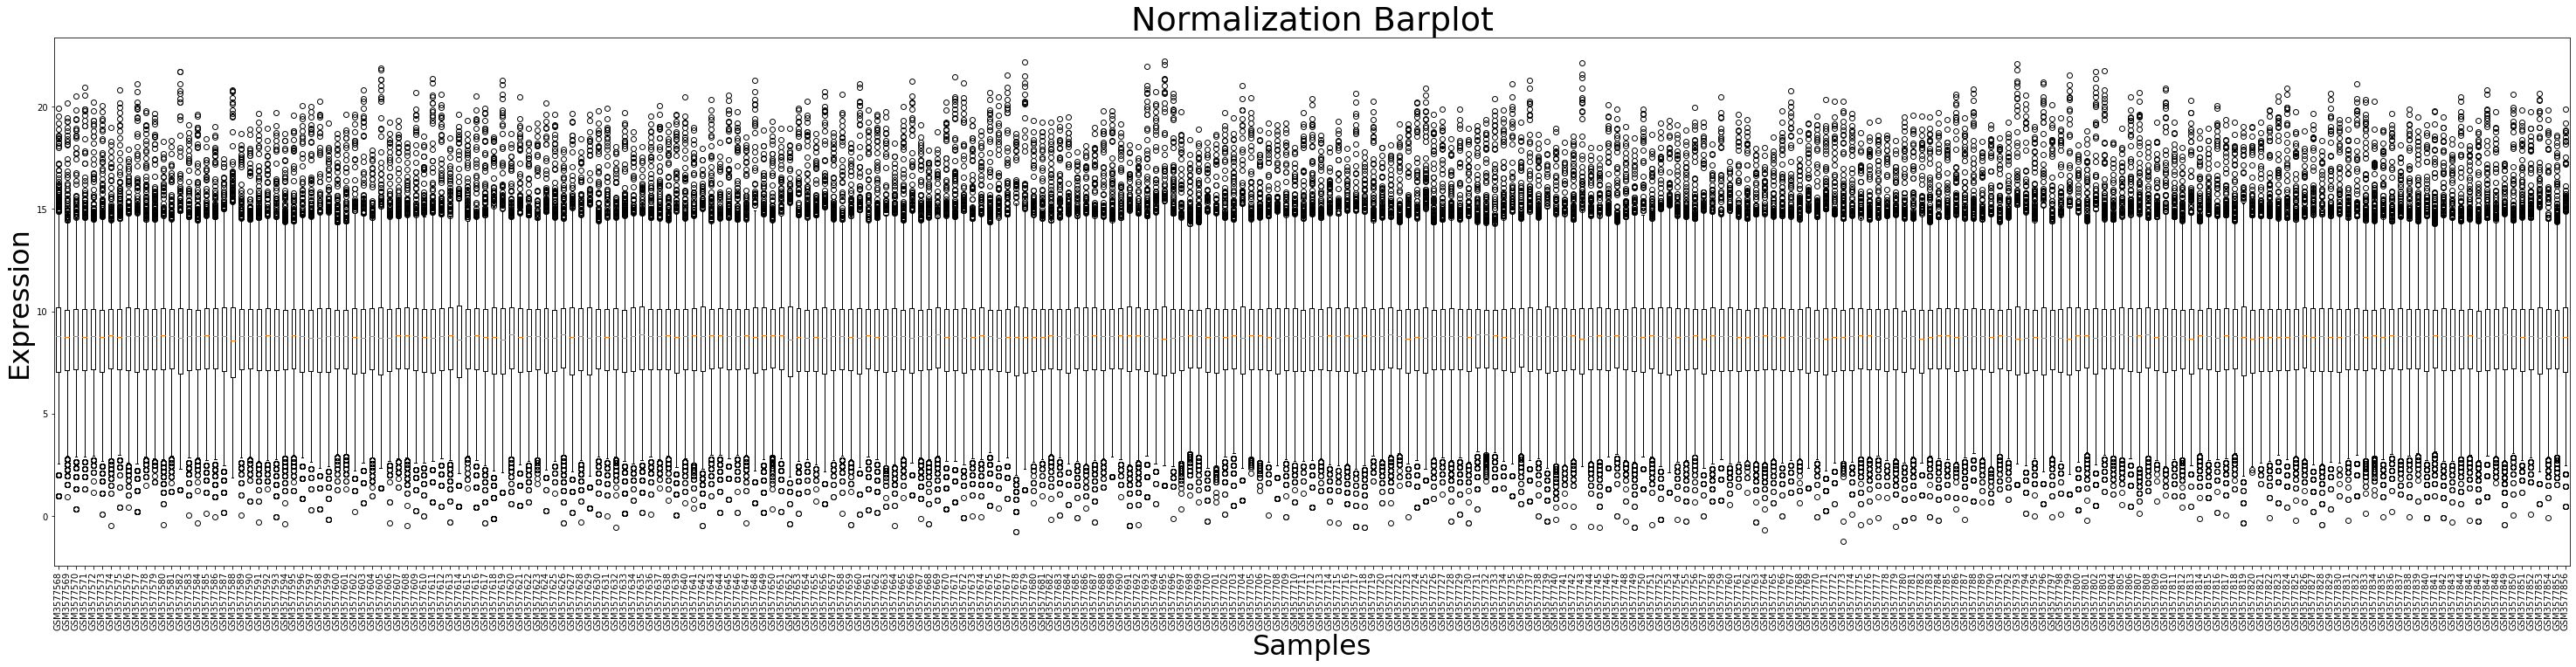

In [8]:
#print(plt.style.available) list of available displays

plt.style.use('fast')
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

fig.set_size_inches(50, 10.5)

plt.boxplot(data)
plt.xticks(rotation = 90)

plt.xlabel("Samples", size = 32)
plt.ylabel("Expression", size = 32)
plt.title("Normalization Barplot", size = 38)

x_ticks = list(df.index)
ax.set_xticklabels(x_ticks)

plt.show()

Step 3 - remove outliers; none exist
Step 4 - find library to convert gene ids into gene symbols - perhaps an R package or online resource?

Possible resource - https://www.researchgate.net/post/How-to-map-probe-ID-with-gene-symbol-in-GEO-dataset
Dataset - https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE125583
Official gene symbols (I think) - https://www.genenames.org/tools/search/

Steps for 4: 

Utilize API provided by NCBI to scrape gene information from data

Source: https://www.ncbi.nlm.nih.gov/home/develop/api/

Entrez appears to be the most promising since it offers databases for genes which is the one we're targeting.

Sample of what we want to achieve: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esummary.fcgi?db=gene&id=100093631
^From that, if I get the <Name> section of the gene and combine them together, then it's all set

Always returns xml file. 

Template: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esummary.fcgi?db=gene&id=[insert custom id parsed from data here]

In [10]:
#need to write a script that automatically runs through the urls for me
import requests as r

genes = "100093631"

#response = r.get(f"https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esummary.fcgi?db=gene&id={genes}") #created a template literal with variable that functions as the value
#print(response)

query = {'db': 'gene', 'id': '100093631,1,2,3,4,5,6,7,8,9'}
response = r.get('https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esummary.fcgi?', params=query)
# print(response.url) just a check to make sure it's asking the right thing
# print(response.content)
# print(response.text)

#parse the xml file
import xml.etree.ElementTree as ET
root = ET.fromstring(response.content)
print(root[0][1][0].text) # <- this gives me the first one... woot!
print(root[0][2][0].text) # <- this is the next one!
print(root[0][3][0].text) # <- this gives the third one!
print(root[0][4][0].text) # <- this gives the fourth one!
print(root[0][5][0].text) # <- this gives the fifth one!
print(root[0][6][0].text) # <- this gives the sixth one!
print(root[0][7][0].text) # <- this gives the seventh one!
print(root[0][8][0].text) # <- this gives the eighth one!
print(root[0][9][0].text) # <- this gives the ninth (nineth) one!
print(root[0][10][0].text) # <- this gives the tenth one!

GTF2IP4
A1BG
A2M
A2MP1
A12M1
A12M2
A12M3
A12M4
AA
NAT1


References: 
- Downloading Document Summaries: https://www.ncbi.nlm.nih.gov/books/NBK25500/#chapter1.Downloading_Document_Summaries
- API Requests tutorial: https://www.nylas.com/blog/use-python-requests-module-rest-apis/
- Using ElementTree: https://www.edureka.co/blog/python-xml-parser-tutorial/#findingelements

In [9]:
# grab gene ids from csv file and pasted it into ids.txt

# Goal is to eventually create a dictionary that links the gene id with the gene symbol

import time  # will be useful when trying to puase the program for a while
import csv
file = open('DESeq2NormalizedData.csv')
csvreader = csv.reader(file)
header = []
header = next(csvreader)
# print(header) #returns all of the gene ids
# remove the first one since that's just a ''
header = header[1:]
# print(header)


# write into the file and then drag it onto the other row later on
with open('key.csv', 'w', newline="") as file:
    csvwriter = csv.writer(file)  # create csvwriter object
    csvwriter.writerow(header)  # write the header (aka the gene ids)

    # have to get the data before I write it
    data = []
    tempIDHolder = []
    # create a dictionary that links the gene id with the gene symbol
    for id in header:
        tempIDHolder.append(id)
        if (len(tempIDHolder) >= 10):
        # request a downloadable summary, etc.
            # first convert the tempIDHolder into actual id value
            id = tempIDHolder[0]
            counter = 0
            for item in tempIDHolder:
                if counter == 0:
                    counter += 1
                else :
                    id = id + ',' + item # hopefully this gets everything?
            # print(id)
            query = {'db': 'gene', 'id': id}
            response = r.get(
                'https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esummary.fcgi?', params=query)
            root = ET.fromstring(response.content)
            data.append(root[0][1][0].text)
            data.append(root[0][2][0].text)
            data.append(root[0][3][0].text)
            data.append(root[0][4][0].text)
            data.append(root[0][5][0].text)
            data.append(root[0][6][0].text)
            data.append(root[0][7][0].text)
            data.append(root[0][8][0].text)
            data.append(root[0][9][0].text)
            data.append(root[0][10][0].text)
            # make it pause or else the API will yell at me (it was like 3 requests per second if I remember correctly)
            # make it sleep for half a second... therefore it should be like 2 requests per second
            # print(root[0][1][0].text)
            time.sleep(.5)
            # reset tempIDHolder
            tempIDHolder.clear()

    csvwriter.writerow(data)

NameError: name 'r' is not defined

In [ ]:
#find the gene ids that I am still missing (since I did it by factors of 10) and manually modify the key.csv
print(len(header))
# result: 16232, so that means I only have to get two, phew!


16232


In [ ]:
# double checking my computer's capability to handle large array sizes - source: https://stackoverflow.com/questions/855191/how-big-can-a-python-list-get#:~:text=According%20to%20the%20source%20code,PY_SSIZE_T_MAX%2Fsizeof(PyObject*)%20.&text=On%20a%20regular%2032bit%20system,bit%20system%20is%20536%2C870%2C912%20elements.
import six
print(six.MAXSIZE)
# result: 9223372036854775807, so yeah it should be fine

9223372036854775807


Resources:
- Manipulating csv file to get just the header: https://www.analyticsvidhya.com/blog/2021/08/python-tutorial-working-with-csv-file-for-data-science/
- How to manipulate python dictionaries: https://www.geeksforgeeks.org/python-dictionary/

Replace DF ids with Gene Symbols

In [10]:
# import conversion library
translate = pd.read_csv("key.csv")
translate.head()

,1,100,1000,10000,100009676,10001,10003,100037417,10004,100049716,...,9987,9988,9989,999,9990,9991,9992,9993,9994,9997
0,A1BG,ADA,CDH2,AKT3,ZBTB11-AS1,MED6,NAALAD2,DDTL,NAALADL1,NINJ2-AS1,...,HNRNPDL,DMTF1,PPP4R1,CDH1,SLC12A6,PTBP3,KCNE2,DGCR2,CASP8AP2,SCO2


In [11]:
colNames = list(translate.iloc[0, :])

DataTot = df.set_axis(colNames, axis=1, inplace=False)
DataTot.head()

,A1BG,ADA,CDH2,AKT3,ZBTB11-AS1,MED6,NAALAD2,DDTL,NAALADL1,NINJ2-AS1,...,HNRNPDL,DMTF1,PPP4R1,CDH1,SLC12A6,PTBP3,KCNE2,DGCR2,CASP8AP2,SCO2
GSM3577568,8.103918,7.937909,10.257489,11.186453,5.995394,7.667819,9.199965,10.280796,6.549983,6.243322,...,11.221806,10.175303,10.056090,5.454826,9.981236,8.396273,5.518956,11.268024,6.487247,9.417459
GSM3577569,7.009610,7.902695,10.120491,10.939458,6.258109,7.682248,7.454174,8.647815,6.885065,6.598184,...,12.246937,11.343959,10.626753,7.470028,10.016374,8.426003,3.276256,11.831612,8.417852,8.438144
GSM3577570,7.046131,7.680613,10.303429,11.387845,6.331885,7.715589,8.728490,8.635666,6.113245,6.541339,...,12.492072,11.431233,10.663922,8.280252,10.833722,8.928075,2.653813,11.588094,9.232752,8.337510
GSM3577571,7.486468,7.611999,10.277881,11.121012,5.280793,7.842296,8.047696,9.168947,6.455880,6.257334,...,11.654149,10.630377,10.269111,5.818450,9.913436,8.332221,4.326597,11.708139,7.896452,9.286598
GSM3577572,7.553102,8.112529,10.274801,11.085076,6.112529,7.578193,7.974453,8.771874,6.264532,7.089446,...,11.903434,10.865720,10.183736,5.993230,10.011766,8.448132,4.383177,11.705105,8.359251,9.140874


Select genes to focus on

Genes extracted from DE here: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE132651

In [12]:
# I used a Google script and ripped off an array and just copy pasted it here. Is it clean? Haha no
gene_list = [ 'MMP1',
  'TFPI2',
  'ANGPT2',
  'SULF1',
  'SULF1',
  'FABP4',
  'ANGPT2',
  'IL1RL1',
  'TFPI2',
  'ADGRF5',
  'FST',
  'VAMP8',
  'SULF1',
  'MRC1',
  'TOX',
  'BASP1',
  'EMCN',
  'LYVE1',
  'COL4A5',
  'MMP10',
  'ANKRD1',
  'TACSTD2',
  'GULP1',
  'RASGRP3',
  'LEPROT///LEPR',
  'GULP1',
  'NUPR1',
  'PBK',
  'SULT1E1',
  'ADGRF5',
  'PROS1',
  'EPB41L3',
  'ALDH1A1',
  'PFN2',
  'FABP5',
  'TSPAN13',
  'FGF13',
  'LIMCH1',
  'GMFG',
  'IL1R1',
  'PDE2A',
  'SRSF6',
  'TGFB2',
  'LYN',
  'CLU',
  'LBH',
  'MIR6787///SLC16A3',
  'EPB41L3',
  'CHST15',
  'ANOS1',
  'TIMP3',
  'RRM2',
  'RGCC',
  'MIR6787///SLC16A3',
  'EPB41L3',
  'FST',
  'HSD17B2',
  'GULP1',
  'THSD7A',
  'SLC6A15',
  'LTBP1',
  'COL13A1',
  'LIMCH1',
  'KRT7',
  'ANXA3',
  'MAD2L1',
  'LAMP3',
  'DYSF',
  'SLC35F6///CENPA',
  'CLEC2B',
  'LDB2',
  'LTBP1',
  'LYVE1',
  'DKK1',
  'RPS4Y1',
  'SLIT2',
  'DPYSL3',
  'FBLN5',
  'NRP2',
  'CXCR4',
  'C10orf10',
  'CLU',
  'NRG1',
  'CSGALNACT1',
  'HJURP',
  'ASPM',
  'PLA2G4C',
  'ADIRF',
  'TOP2A',
  'BST2',
  'CD44',
  'HLA-B',
  'LIMCH1',
  'TGFB2',
  'DLGAP5',
  'SULT1B1',
  'SACS',
  'COL3A1',
  'HMMR',
  'LOC101930400///AKR1C2',
  'TIMP3',
  'IFI27',
  'BMP4',
  'NID1',
  'UCHL1',
  'NDC1',
  'SHCBP1',
  'LYN',
  'EMP3',
  'CCND2',
  'CCL15-CCL14///CCL14',
  'CDC20',
  'MAFB',
  'GPX3',
  'AURKA',
  'PTTG1',
  'RFC3',
  'BCAT1',
  'RBP1',
  'MEIS2',
  'CCNB1',
  'SH3BP5',
  'VCAM1',
  'CKS1B',
  'PRC1',
  'JUP',
  'GJA4',
  'NCAPG',
  'LYPD1',
  'BCHE',
  'TMEM140',
  'IGFBP2',
  'CCND2',
  'HOXA10-HOXA9///MIR196B///HOXA9',
  'AKR1C1',
  'TNFSF10',
  'PODXL',
  'IL13RA2',
  'SPC25',
  'UBE2S',
  'GYPC',
  'NDC80',
  'ABCG1',
  'CEP55',
  'EIF1AY',
  'GATA6',
  'GPRC5A',
  'PDPN',
  'TNFSF10',
  'CD36',
  'RELN',
  'CCNA2',
  'CSF2RB',
  'ANPEP',
  'CDK1',
  'GJA4',
  'MT1M',
  'TRPV2',
  'RRM2',
  'CLU',
  'GPX3',
  'TGFBR2',
  'CCNA1',
  'SMC2',
  'UBD///GABBR1',
  'TGFB2',
  'ADD3',
  'FHL1',
  'KIAA0101',
  'MELK',
  'SQRDL',
  'PIEZO2',
  'RRP15',
  'DEPDC1',
  'XIST',
  'TPD52',
  'SOX18',
  'OIP5',
  'MFAP2',
  'MPZL2',
  'TMPO',
  'CCNA2',
  'TPX2',
  'TRIP13',
  'PCDH7',
  'PLPP3',
  'PCNA',
  'PTPRN2',
  'POSTN',
  'NRP2',
  'BACE2',
  'NPTX2',
  'DKK3',
  'PLOD2',
  'TGFBR2',
  'SPRY1',
  'HSPD1',
  'MT1X',
  'KIF20A',
  'CENPN' ]


In [37]:
# see which ones match
colNames = list(DataTot.columns)

geneOverlap = list(set(gene_list).intersection(colNames))
len(geneOverlap)

120

In [38]:
selectDf = DataTot.loc[:, geneOverlap[0:100]]
# create an excel file of the dataframe
# selectDf.to_excel("completeDataset.xlsx")
selectDf.head()

,TGFBR2,GPX3,TNFSF10,SH3BP5,ANPEP,TMPO,LYN,PCDH7,SHCBP1,SLIT2,...,TPD52,FGF13,SULF1,ANGPT2,LYPD1,MEIS2,EPB41L3,DKK3,NRG1,COL4A5
GSM3577568,9.646446,10.707921,6.165319,9.280796,7.518956,8.878037,8.114335,9.134945,1.995394,7.145141,...,9.887178,8.557636,6.039788,8.518956,11.566198,9.204847,10.028817,14.082691,4.902285,8.871911
GSM3577569,11.126130,9.470028,8.725817,10.012320,8.554241,9.316272,8.473964,7.914330,4.908524,8.908524,...,9.518477,7.104075,6.202255,7.388956,9.670290,8.516570,10.382688,13.280336,2.954328,10.967651
GSM3577570,10.633381,9.343112,7.541339,10.052984,7.521710,9.805591,8.778968,8.946595,5.032325,9.250748,...,10.947515,8.536456,6.689437,8.680613,9.063204,9.211468,11.177375,12.592805,2.331885,11.440410
GSM3577571,10.299576,10.512711,7.068063,9.946816,8.233487,8.777808,8.810412,8.911559,4.496522,8.435121,...,10.151555,9.574524,5.455880,8.445538,9.974055,8.948648,10.224442,13.763698,5.133951,8.634936
GSM3577572,10.647002,10.265820,6.510289,9.931289,8.434457,9.074829,8.523267,8.929665,3.835689,8.123934,...,9.952233,8.212065,6.112529,8.635095,10.601836,9.089446,10.780908,13.643539,4.457178,10.225362


Make dataset

In [39]:
# create 70/30 split
shuffledData = selectDf.sample(frac=1, random_state=42)
shuffledData.head()

,TGFBR2,GPX3,TNFSF10,SH3BP5,ANPEP,TMPO,LYN,PCDH7,SHCBP1,SLIT2,...,TPD52,FGF13,SULF1,ANGPT2,LYPD1,MEIS2,EPB41L3,DKK3,NRG1,COL4A5
GSM3577613,9.529816,9.174571,6.023025,10.766368,6.626135,9.583430,8.045674,10.912153,3.967172,9.011566,...,11.793720,10.226048,7.227039,7.273833,8.866449,9.194978,12.280771,14.197129,6.827769,10.408369
GSM3577725,11.353497,11.150213,7.754728,9.098683,7.158625,8.793057,8.520263,7.851302,3.317323,6.776755,...,8.663098,7.432800,6.615004,10.477195,10.667526,9.497232,8.668999,14.162290,3.539716,7.709641
GSM3577842,10.015782,10.374730,6.377773,9.942329,6.924407,9.730176,8.385855,9.005327,2.487002,7.802906,...,10.869266,8.535035,6.361471,7.061911,10.305052,9.371681,10.976850,13.416754,4.294357,10.502882
GSM3577610,8.696405,9.642767,7.397114,10.155517,7.002095,8.635462,8.068692,10.368761,4.261337,9.132351,...,11.086213,9.560304,7.251815,7.788197,9.851038,8.892993,11.478976,14.265262,6.456353,8.513256
GSM3577749,9.515565,9.392134,6.948172,11.025167,6.245716,9.195675,7.406871,11.081365,5.018945,9.753222,...,11.052134,10.032312,7.940090,7.991833,8.519639,9.229228,12.401914,14.269697,7.018945,9.740481


In [40]:
x, y = shuffledData.shape
splitThreshold = round(x*.7)

TrainData = shuffledData.iloc[0:splitThreshold, :]
TestData = shuffledData.iloc[splitThreshold:, :]

In [42]:
# create input and output set (50/50) for now, but may change later
# randomize columns
tempShuffleDf = TrainData.T
tempShuffleDf = tempShuffleDf.sample(frac=1, random_state=500)
TrainData = tempShuffleDf.T
tempShuffleDf = TestData.T
tempShuffleDf = tempShuffleDf.sample(frac=1, random_state=500)
TestData = tempShuffleDf.T

# split the data
x_train = TrainData.iloc[:, 0:50]
y_train = TrainData.iloc[:, 50:]

x_test = TestData.iloc[:, 0:50]
y_test = TestData.iloc[:, 50:]

# print(tempShuffleDf.T) #note .T transposes/reverses the data
y_test.head()

,COL13A1,VAMP8,COL4A5,RBP1,GPX3,PCDH7,TSPAN13,LYN,FGF13,GMFG,...,CLU,MPZL2,GYPC,SRSF6,CHST15,ANOS1,TGFB2,BST2,SH3BP5,IFI27
GSM3577721,4.042202,7.249798,11.502805,8.350325,8.454016,10.410605,10.508643,8.529468,9.346853,6.391352,...,15.922096,6.705167,7.336386,11.463666,9.504753,8.732034,10.159660,8.926009,10.751861,8.832279
GSM3577591,4.030785,6.686137,9.050932,8.984981,9.109736,10.202712,10.233399,7.560606,9.773600,7.066409,...,16.520056,2.708857,7.651371,10.828447,9.638115,7.928025,9.120368,9.198705,10.305978,10.129870
GSM3577814,4.412141,9.838406,11.208251,8.582066,10.126984,7.813391,7.539630,10.042131,6.888579,8.711946,...,16.486762,8.528824,9.333594,11.463645,9.783397,8.443168,9.635093,10.426768,10.646802,9.601106
GSM3577810,3.448844,7.883472,10.539618,8.879296,9.799783,8.858235,9.495968,7.734246,8.149284,7.493238,...,17.285067,6.536307,7.999591,11.367707,8.834706,7.541601,9.780880,10.576838,9.579414,9.756045
GSM3577649,3.872564,9.180553,11.345801,9.623335,8.764581,8.551503,9.143668,9.166478,8.585752,8.085014,...,16.149919,8.238214,8.764581,11.219930,8.960027,7.631556,9.188933,10.379139,10.823176,9.464446


In [43]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(202, 50)
(202, 50)
(87, 50)
(87, 50)


Train Random Forest

I used classification first simply because it was the first one lol... future Amy here. Turns out I should be using regression instead or else I run into a 'continuous-multioutput' error... 

In [21]:
# importing sklearn (and pandas again) because my computer doesn't recognize it
! /Users/Amy/anaconda3/python.exe -m pip install sklearn

In [44]:
# ml imports
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn import datasets # for dataset

In [14]:
print(x_train.shape)
print(y_train.shape)
print(df.iloc[0, 0])
print('---------')
print(selectDf.head(0).columns)

(202, 50)
(202, 50)
8.103918478
---------
Index(['IL1R1', 'LDB2', 'NUPR1', 'CLEC2B', 'UCHL1', 'PCDH7', 'COL3A1', 'CENPN',
       'NPTX2', 'CHST15', 'NID1', 'TGFBR2', 'PDPN', 'TRPV2', 'CD44', 'SLIT2',
       'MT1X', 'MT1M', 'MPZL2', 'JUP', 'CXCR4', 'PLPP3', 'ADD3', 'PTPRN2',
       'DPYSL3', 'RRP15', 'FHL1', 'ANOS1', 'PCNA', 'TPD52', 'EMCN', 'BASP1',
       'LTBP1', 'MRC1', 'TMEM140', 'LIMCH1', 'TMPO', 'NRG1', 'VCAM1', 'SULF1',
       'TNFSF10', 'AKR1C1', 'RGCC', 'RELN', 'CCND2', 'GJA4', 'LYN', 'GMFG',
       'LYPD1', 'PRC1', 'BMP4', 'VAMP8', 'CCNA1', 'ANXA3', 'DYSF', 'NRP2',
       'BST2', 'EPB41L3', 'PODXL', 'MEIS2', 'BACE2', 'ANPEP', 'RASGRP3',
       'SMC2', 'GYPC', 'THSD7A', 'PROS1', 'IGFBP2', 'TSPAN13', 'TRIP13',
       'COL4A5', 'ADGRF5', 'PFN2', 'TIMP3', 'FGF13', 'TOX', 'ADIRF', 'CCNB1',
       'SPRY1', 'LYVE1', 'SRSF6', 'LBH', 'DKK3', 'PLOD2', 'ANGPT2', 'PIEZO2',
       'SHCBP1', 'UBE2S', 'BCAT1', 'SOX18', 'PDE2A', 'NCAPG', 'SACS', 'KIF20A',
       'SH3BP5', 'MAFB', 'IFI27', 'C

In [45]:
# convert tempShuffleDf into numpy ndarrays
X, y = datasets.load_diabetes(return_X_y=True)
z = datasets.load_diabetes(return_X_y=True)
print(X.shape) #x has 2 dimensions
print(y.shape) #y has to only have 1 dimension, appears to only have the answers???
print(len(z)) #z has two dimensions 

numpyArray = tempShuffleDf.to_numpy()
print(numpyArray.shape)

(442, 10)
(442,)
2
(100, 87)


In [46]:
# instantiate model and train
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(x_train, y_train) #nah this should work... but it just doesn't quite match the actual thing nicely

RandomForestRegressor(random_state=42)

Test Random Forest

In [47]:
y_pred = reg.predict(x_test)

In [48]:
print(y_test.shape, y_pred.shape) #wtf y_pred is already a numpyarray whereas y_test is the one that isn't
ny_test = y_test.to_numpy()
print(y_pred[:, 0])
print(ny_test[:, 0])

(87, 50) (87, 50)
[3.52935741 3.80636398 4.66041475 4.04399809 3.92332259 3.454883
 3.98039222 3.65697168 3.612873   3.6120968  3.87042891 4.02732771
 4.1984433  4.04494945 4.08411047 3.64272378 3.60071033 3.95221232
 3.99306591 3.66969979 3.34183549 4.19350001 4.28358976 4.12631738
 4.14544123 3.83987671 3.62899223 4.60690498 3.85430601 4.41444372
 4.31288955 4.16203585 4.15767893 3.56214132 4.23801746 3.92577423
 4.1068301  4.33685802 4.32279687 4.39710027 4.21178729 3.68616535
 3.46929986 4.33605325 3.49653666 4.27443627 3.80739871 3.95379549
 3.95649241 3.74981842 4.26111685 3.77532389 3.6327091  3.57133107
 4.06796031 4.21232338 3.81927978 4.30180939 3.819208   3.53605556
 3.98385856 3.8323607  4.19585678 3.60476946 3.98854474 3.65959837
 4.83212076 3.99286963 3.9978589  3.88682196 4.04531834 3.72179685
 3.97205698 3.92372214 3.71427784 4.1179093  4.38647193 4.16619177
 3.82473442 4.12545639 3.95431736 3.62279714 3.80110768 4.04183739
 3.87489062 4.02077608 4.37754605]
[4.04220247

In [49]:
df2 = pd.DataFrame()
df2['Predicted'] = y_pred[:, 0]
df2['Actual'] = ny_test[:, 0]

df2

,Predicted,Actual
0,3.529357,4.042202
1,3.806364,4.030785
2,4.660415,4.412141
3,4.043998,3.448844
4,3.923323,3.872564
...,...,...
82,3.801108,4.377671
83,4.041837,2.863838
84,3.874891,3.290233
85,4.020776,3.939213


In [50]:
print(y_pred[:, 0].tolist())
print(ny_test[:, 0].tolist())

[3.5293574103700007, 3.8063639839299976, 4.66041474533, 4.04399808676, 3.9233225850300033, 3.454882998339999, 3.980392215910001, 3.6569716835499997, 3.6128729982599985, 3.612096800880003, 3.8704289077800014, 4.02732770573, 4.198443296059999, 4.044949451150002, 4.08411047361, 3.6427237805299986, 3.6007103324500003, 3.9522123151299957, 3.99306590824, 3.6696997866000007, 3.341835494129998, 4.193500013860002, 4.283589762359998, 4.126317381810001, 4.145441232219998, 3.839876706130001, 3.6289922310300025, 4.606904980399999, 3.8543060064999977, 4.414443717539996, 4.312889554460001, 4.162035851790001, 4.157678927080001, 3.562141319290004, 4.238017462440001, 3.9257742290400013, 4.106830100700002, 4.336858022009999, 4.322796868539997, 4.397100265669998, 4.21178729103, 3.686165353400001, 3.469299857340001, 4.336053246759999, 3.4965366634600024, 4.274436269589999, 3.807398708889999, 3.9537954901300014, 3.9564924132199986, 3.7498184245999973, 4.261116846870004, 3.7753238853599993, 3.632709098019997

In [51]:
predicted = [7.090191573100002, 7.458117004670004, 8.600444416470005, 7.788848798920004, 8.40825437213, 7.020327500409999, 8.818133271350002, 7.8266646558799975, 6.9378079908900006, 6.872748400490001, 7.506390345189996, 8.676429359800004, 8.554343255570004, 7.166067258440004, 8.747529485299998, 7.968960927520005, 7.452849082630001, 7.761508404270005, 8.320082494520001, 7.971978045290004, 6.697892382179999, 8.949659341020002, 8.5578288482, 8.959041092180001, 8.720058047870003, 9.099238304330001, 6.597845043869999, 8.771403687159996, 8.97738436032, 9.337057343459998, 8.615097380400004, 8.379626407890001, 6.837338580420003, 6.728788978850002, 6.72586007986, 8.569162017440004, 8.760991396020003, 6.398245022990002, 8.775553368840006, 8.599701066330004, 6.706699092590001, 7.119638600939998, 7.276036668970002, 8.70239843987, 7.404154973279999, 8.162479427099996, 6.613187798319999, 8.779790491420004, 8.06791024708, 7.6901312955200005, 6.943329752419999, 7.805397315200001, 7.597572052499999, 7.180362284900005, 8.814388118280004, 8.770979079269997, 8.452227193040002, 8.525045438540001, 7.466116578500001, 6.994484173059999, 7.585299090140003, 8.753943669680002, 8.870920817819997, 7.499310703240001, 9.286605262920002, 7.215856328890001, 9.01209597088, 8.669163431630004, 7.186433201240003, 7.302876306980005, 8.488108625080002, 7.504864159039996, 7.927865327730001, 6.44979854136, 7.310411780489999, 8.626030034680007, 8.696088902549997, 7.079432411410002, 8.071684938880002, 8.670569142679998, 7.816587408060005, 8.141853975380002, 8.353289437620003, 8.788246874929996, 8.285601362710002, 8.440699586870002, 8.812269140540002]
actual = [6.897812565, 7.338213509, 8.702359981, 7.948689744, 8.542811765, 6.837543279, 9.269233796, 8.330263567, 6.537387668, 7.477668772, 7.705141327, 8.388086398, 9.047330902, 7.177687891, 10.07887491, 9.96112512, 8.251808157, 6.519026254, 8.593129162, 8.215544999, 7.127999315, 10.67614923, 8.178851803, 9.602720917, 8.661232602, 9.332002144, 5.497343234, 8.824692683, 9.209058607, 10.23649005, 9.169253621, 8.778581143, 7.461903599, 5.902414739, 6.728518061, 9.278008069, 8.990431014, 6.179569244, 9.553214953, 9.109478527, 5.240724147, 6.385636127, 7.785670875, 7.881095765, 7.66056203, 7.875984985, 6.533125215, 8.506735274, 8.547510836, 7.644934135, 7.248378845, 8.506008575, 7.605692603, 7.694407888, 9.458641893, 8.627903977, 9.76776567, 8.207819731, 7.342463366, 7.43472634, 8.535281792, 8.828590939, 9.350347751, 7.530876833, 9.484744463, 7.558263108, 9.522007793, 9.427759537, 8.263312582, 7.284029873, 8.352555076, 6.142537446, 8.535022869, 5.554148673, 7.672479957, 8.185338403, 8.421832893, 7.733339952, 9.832547685, 8.320524407, 8.941760952, 9.285487465, 9.122246483, 8.718260929, 8.794853801, 8.622207487, 10.1410804]

# find the percent difference of each value, add them up and divide by 87 to find average percent difference
averagePercentDifference = 0
for index in range(87):
    # percent difference equation: |pred-actual|/actual
    averagePercentDifference += abs(predicted[index]-actual[index])/actual[index] * 100
# divided by 87
averagePercentDifference /= 87

averagePercentDifference

6.545287811617056

# Combining the previous steps to check reliability and run tests repeatedly

In [5]:
# run this test multiple times... because I am not convinced of the results
import pandas as pd
import random

aggregateAverage = 0
for i in range(100):
    # convert the completeDataset.xlsx into a pandas dataframe because I don't want to redo the previous steps over and over again every time I reopen the notebook
    selectDf = pd.read_excel("completeDataset.xlsx", index_col=0)

    randNum = random.randrange(500)
    # create 70/30 split of training and testing datasets
    shuffledData = selectDf.sample(frac=1, random_state=42)

    x, y = shuffledData.shape
    splitThreshold = round(x*.7)

    TrainData = shuffledData.iloc[0:splitThreshold, :]
    TestData = shuffledData.iloc[splitThreshold:, :]

    # create input and output set (50/50) for now, but may change later
    # randomize columns
    tempShuffleDf = TrainData.T
    tempShuffleDf = tempShuffleDf.sample(frac=1, random_state=randNum)
    TrainData = tempShuffleDf.T
    tempShuffleDf = TestData.T
    tempShuffleDf = tempShuffleDf.sample(frac=1, random_state=randNum)
    TestData = tempShuffleDf.T

    splitIndex = 50
    # all with random states of 42, 500, 500
    # 50: 5.7882646324415745
    # 53: 5.399498363034576
    # 54: 3.921148973796485
    # 55: 2.304820171930237
    # 60: 3.2357021837407194
    # 75: 2.16648282736738
    # split the data
    x_train = TrainData.iloc[:, 0:splitIndex]
    y_train = TrainData.iloc[:, splitIndex:]

    x_test = TestData.iloc[:, 0:splitIndex]
    y_test = TestData.iloc[:, splitIndex:]

    # ml import
    from sklearn.ensemble import RandomForestRegressor

    # instantiate model and train
    reg = RandomForestRegressor(n_estimators=100, random_state=42)
    reg.fit(x_train, y_train)

    # actually train the model
    y_pred = reg.predict(x_test)
    ny_test = y_test.to_numpy()

    # find the percent difference of each value, add them up and divide by 87 to find average percent difference
    predicted = y_pred[:, 0].tolist()
    actual = ny_test[:, 0].tolist()

    averagePercentDifference = 0
    for index in range(87):
        # percent difference equation: |pred-actual|/actual
        averagePercentDifference += abs(predicted[index]-actual[index])/actual[index] * 100
    # divided by 87
    averagePercentDifference /= 87
    aggregateAverage += averagePercentDifference
    # print(averagePercentDifference)
aggregateAverage /= 100

aggregateAverage

5.562860027383956

Tuning the hyperparameters - source: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [10]:
from pprint import pprint

print('Parameters currently in use: \n')
pprint(reg.get_params())

Parameters currently in use: 

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [11]:
# from the article it states that the most important hyperparameters is the n_estimators (# of trees), number of features (max_features)
# possible adjustments to be made and explanation
'''
n_estimators = number of trees in the foreset
max_features = max number of features considered for splitting a node
max_depth = max number of levels in each decision tree
min_samples_split = min number of data points placed in a node before the node is split
min_samples_leaf = min number of data points allowed in a leaf node
bootstrap = method for sampling data points (with or without replacement)
'''
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)
# total of 4320 possible settings

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


Random Search Training

In [13]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

rf_random.best_params_

'''
Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}
'''

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [44]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    # print('Average Error: {:0.4f} degrees.'.format(np.mean(errors))) this just doesn't seem to want to work...
    print('Accuracy = {:0.2f}%.'.format(np.mean(accuracy.to_list())))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(x_train, y_train)
base_accuracy = evaluate(base_model, x_test, y_test)

print()

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, x_test, y_test)

Model Performance
Accuracy = 91.64%.

Model Performance
Accuracy = 92.13%.


Grid Search with Cross Validation

In [105]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_depth': [130, 140, 150], #why is it these values... idk myself ngl
    'max_features': [8, 9], #idk for these values either tbh... maybe research later
    'min_samples_leaf': [1],
    'min_samples_split': [2],
    'n_estimators': [500]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [106]:
# Fit the grid search to the data
grid_search.fit(x_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 6 candidates, totalling 18 fits


{'bootstrap': False,
 'max_depth': 140,
 'max_features': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

In [107]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, x_test, y_test)

# '''
# {'bootstrap': False,
#  'max_depth': 70,
#  'max_features': 6,
#  'min_samples_leaf': 1,
#  'min_samples_split': 2,
#  'n_estimators': 500}
# Accuracy of 92.14% lol
# '''

Model Performance
Accuracy = 92.14%.
